In [4]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset (replace with your own path if needed)
df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(df.isnull().sum())
print(df.describe())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [8]:
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDescriptive Stats:\n", df.describe())

# Check TotalCharges column
print("\nTotalCharges Sample:\n", df['TotalCharges'].head(10))
print("Type of TotalCharges:", df['TotalCharges'].dtype)

Shape: (7043, 21)

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract          

In [10]:
# Convert TotalCharges to numeric, force errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges is NaN
df.dropna(subset=['TotalCharges'], inplace=True)

# Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Confirm
print("New shape after dropping rows:", df.shape)

New shape after dropping rows: (7032, 21)


Churn Value Counts:
 Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn Percentage:
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


/tmp/ipython-input-14-3415075686.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=['#2e86de', '#e74c3c'])


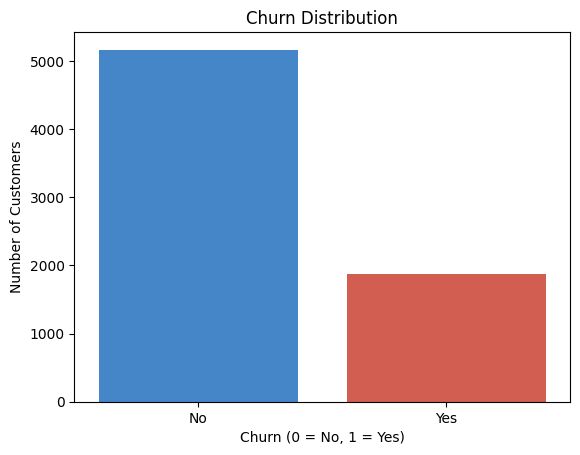

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count values
print("Churn Value Counts:\n", df['Churn'].value_counts())
print("\nChurn Percentage:\n", df['Churn'].value_counts(normalize=True) * 100)

# Plot with custom color
sns.countplot(x='Churn', data=df, palette=['#2e86de', '#e74c3c'])
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()


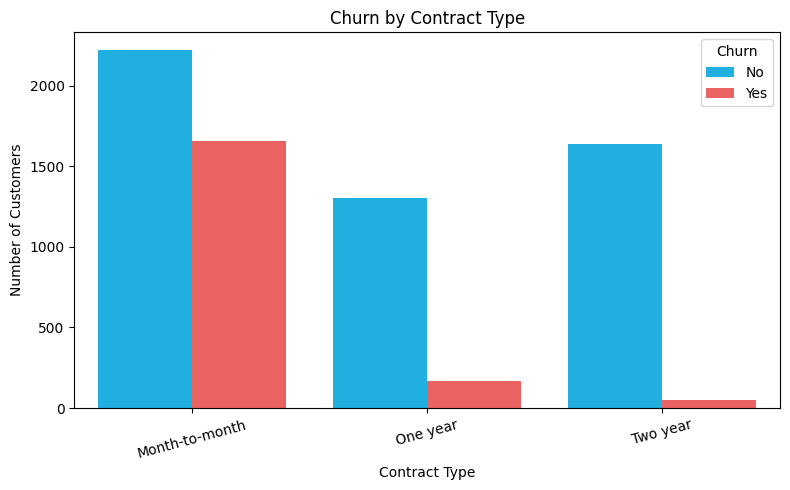

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of Contract Type vs Churn
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df, palette=['#00bfff', '#ff4d4d'])

plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

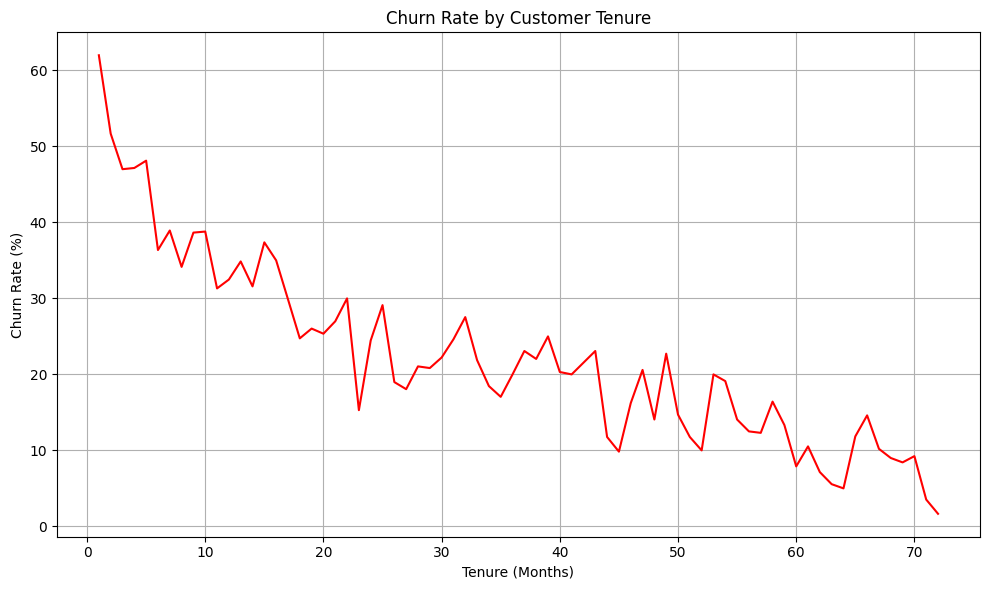

In [28]:
# Group by tenure and calculate churn rate
churn_rate_by_tenure = df.groupby('tenure')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_rate_by_tenure = churn_rate_by_tenure['Yes'] * 100  # Convert to % if 'Yes' exists

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=churn_rate_by_tenure.index, y=churn_rate_by_tenure.values, color='red')

plt.title('Churn Rate by Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
churned_df = df[df['Churn'] == 'Yes']

In [30]:
# Convert TotalCharges to numeric (some values are strings or spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-30-1804469448.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [66]:
# Total and average revenue lost
total_loss = churned_df['TotalCharges'].sum()
average_loss_per_customer = churned_df['TotalCharges'].mean()

print(f"Total Revenue Lost Due to Churn: ${total_loss:,.2f}")
print(f"Average Revenue Lost per Churned Customer: ${average_loss_per_customer:,.2f}")


Total Revenue Lost Due to Churn: $2,862,926.90
Average Revenue Lost per Churned Customer: $1,531.80


In [33]:
monthly_loss = churned_df['MonthlyCharges'].sum()
print(f"📆 Approx. Monthly Revenue Lost (if churned customers stayed): ${monthly_loss:,.2f}")

📆 Approx. Monthly Revenue Lost (if churned customers stayed): $139,130.85


In [35]:
# Split retained and churned revenue
retained_revenue = df[df['Churn'] == 'No']['TotalCharges'].sum()
churned_revenue = df[df['Churn'] == 'Yes']['TotalCharges'].sum()

# Labels and values
labels = ['Retained Revenue', 'Lost Revenue (Churned)']
values = [retained_revenue, churned_revenue]
colors = ['#00bfff', '#ff4d4d']  # Blue = retained, Red = churned


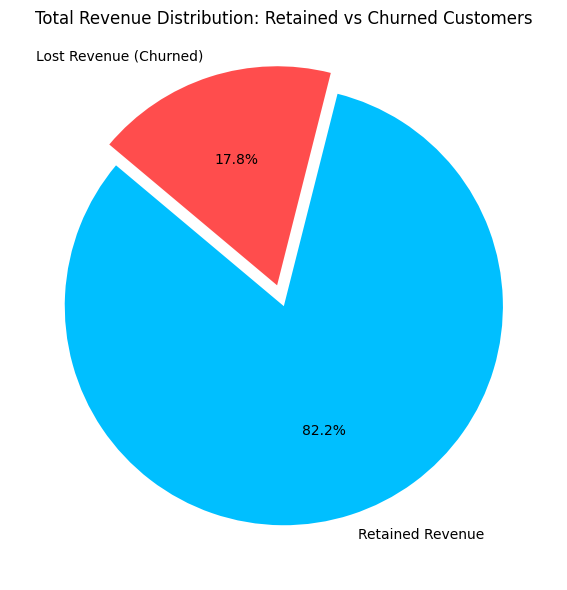

In [36]:
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0, 0.1))
plt.title('Total Revenue Distribution: Retained vs Churned Customers')
plt.tight_layout()
plt.show()


In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Detect all object-type columns (categorical)
cat_cols = X.select_dtypes(include='object').columns

# Encode each one
for col in cat_cols:
    X[col] = le.fit_transform(X[col])


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5625, 19)
Test shape: (1407, 19)


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.79

 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



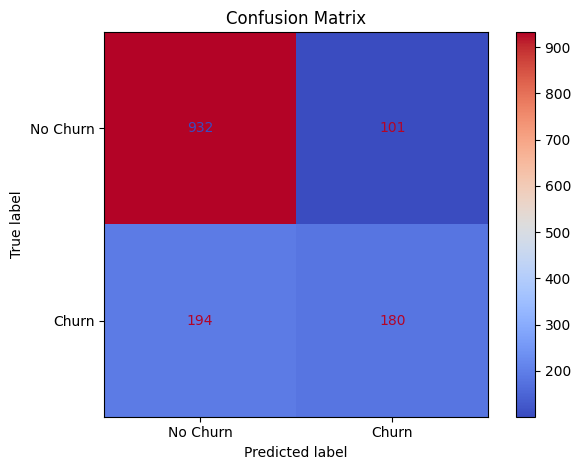

In [63]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

/tmp/ipython-input-65-1185379254.py:20: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


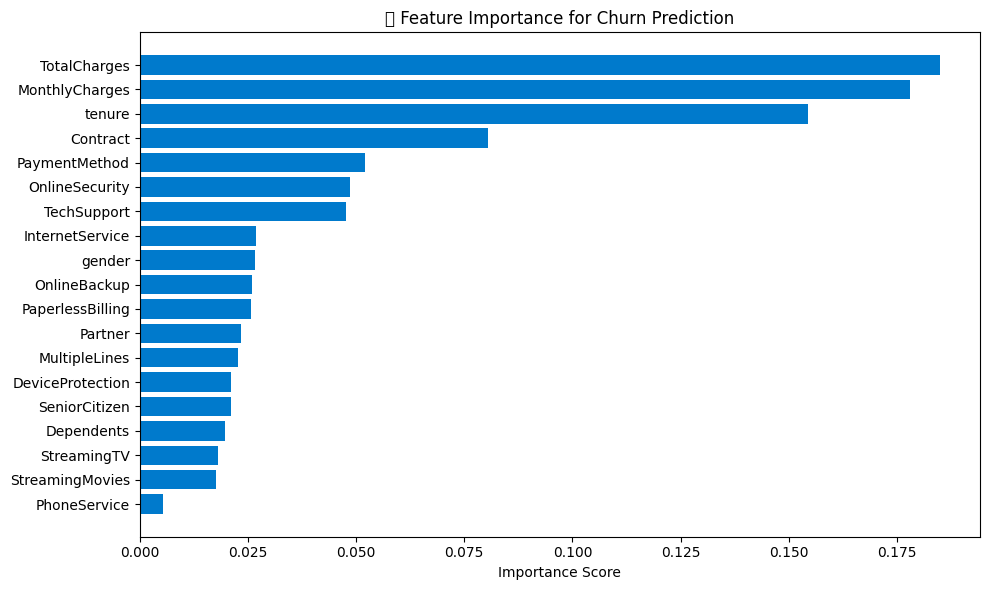

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='#007acc')
plt.gca().invert_yaxis()
plt.title('🔍 Feature Importance for Churn Prediction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()
